# **Analyzing Movie Data through Python**

# ** Importing Our Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Our Data Sets**
Below we are importing the data sets we will use into our Jupyter Notebook

### **Importing Our Bom Movie Gross CSV File**
Below we are importing our Bom Movie data set using pandas

In [57]:
bom_df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 1/Phase_1_Project/Exploratory-Data-Analysis-Using-Movie-Data/seamus/Movie Project Data/bom.movie_gross.csv')

In [58]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## **Cleaning things up**

After taking a look at the data, we see that the studio, domestic_gross, and foreign_gross columns all have missing data.

Since there are only a small amount of missing values for the domestic_gross column, we decide to fill the missing data with the median values as to not skew the distribution.

In [59]:
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median())

We also decide that we won't be using the foreign_gross column, so we drop it altogether

In [60]:
bom_df = bom_df.drop('foreign_gross', axis=1)

Finally, we drop the last of the rows with missing data. It should only be 5 null rows from the Studio column

In [61]:
bom_df.dropna(inplace = True)

In [62]:
bom_df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


## **Importing Our TN Movie Budgets CSV File**

Below we are importing our TN Movie Budget data set using pandas in a similar fashion to our IMDB CSV file.

In [79]:
tn_df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 1/Phase_1_Project/Exploratory-Data-Analysis-Using-Movie-Data/seamus/Movie Project Data/tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## **Merging our datasets**

We found that both of these datasets have a column with names of movies as their values. Because of that, we decide to merge these datasets together as an inner join.

In [67]:
df3 = pd.merge(tn_df, bom_df, left_on='movie', right_on='title')
df3

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,BV,459000000.0,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,BV,678800000.0,2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Justice League,WB,229000000.0,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Spectre,Sony,200100000.0,2015
...,...,...,...,...,...,...,...,...,...,...
1241,68,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",Sound of My Voice,FoxS,408000.0,2012
1242,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",Your Sister's Sister,IFC,1600000.0,2012
1243,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",The Gallows,WB (NL),22800000.0,2015
1244,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",A Ghost Story,A24,1600000.0,2017


## **Some more cleaning**

First up, after seeing the new df3 table above, we can see that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are listed as strings. Since we can't use strings to visualize data, we will clean them below by removing punctation and converting them from strings to integers

In [68]:
df3['production_budget'] = df3['production_budget'].str.replace('$', '')
df3['production_budget'] = df3['production_budget'].str.replace(',', '')
df3['domestic_gross_x'] = df3['domestic_gross_x'].str.replace('$', '')
df3['domestic_gross_x'] = df3['domestic_gross_x'].str.replace(',', '')
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace('$', '')
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace(',', '')

In [69]:
df3 = df3.astype({'production_budget':'int'})
df3 = df3.astype({'domestic_gross_x':'int'})
df3 = df3.astype({'worldwide_gross':'int'})

We also want to update the release date column into a datetime type so we can more easily use it.

In [70]:
df3['release_date'] = pd.to_datetime(df3['release_date'], infer_datetime_format=True)

### **Return on Investment:**
Below we are creating a new column titled "Return on Investment" (ROI) so we can measure the return on investment on different types of films. Additionally, we are cleaning up our new column and dataframe by removing rows where ROI is 0. Given that this table is telling us that ROI is "0" might tell us that this data is wrong.

In [71]:
df3['return_on_investment'] = (df3['worldwide_gross']/df3['production_budget'])*100

In [72]:
# Removing ROI values that are $0.
df3 = df3[df3['return_on_investment'] != 0]

### **Release Month**
We're also creating a "Release Month" column so we can measure across the time of the year

In [73]:
df3['release_month'] = pd.DatetimeIndex(df3['release_date']).month
df3

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,year,return_on_investment,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,2011,254.667286,5
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,2015,424.384139,5
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,2018,682.711400,4
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.0,2017,218.648403,11
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.0,2015,293.206974,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,68,2012-04-27,Sound of My Voice,135000,408015,429448,Sound of My Voice,FoxS,408000.0,2012,318.109630,4
1242,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,Your Sister's Sister,IFC,1600000.0,2012,2575.494167,6
1243,80,2015-07-10,The Gallows,100000,22764410,41656474,The Gallows,WB (NL),22800000.0,2015,41656.474000,7
1244,86,2017-07-07,A Ghost Story,100000,1594798,2769782,A Ghost Story,A24,1600000.0,2017,2769.782000,7


Now we can see how return on investment differs across months of the year

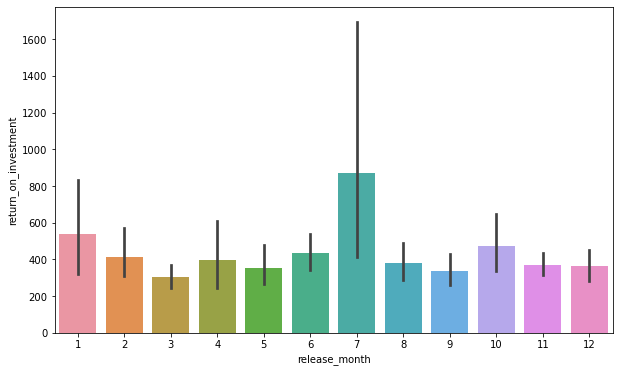

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="return_on_investment", data=df3)

plt.show()

It looks like July is the best month to release a movie based on ROI. However, there is a HUGE confidence interval. Let's see if we control for some outliers if it is still a good month for releases.

Below, we are creating a new column, "clean_roi", that has values that fall within the inter quartile range (IQR) of our return_on_investment column.

In [76]:
q1 = df3['return_on_investment'].quantile(0.25)
q3 = df3['return_on_investment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new column that contains only the non-outlier values
df3['clean_roi'] = df3.loc[(df3['return_on_investment'] >= lower_bound) & (df3['return_on_investment'] <= upper_bound), 'return_on_investment']
df3.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,year,return_on_investment,release_month,clean_roi
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,2011,254.667286,5,254.667286
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,2015,424.384139,5,424.384139
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,2018,682.711400,4,682.711400
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.0,2017,218.648403,11,218.648403
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.0,2015,293.206974,11,293.206974


Now let's see if July is still a good month for a release, based on ROI.

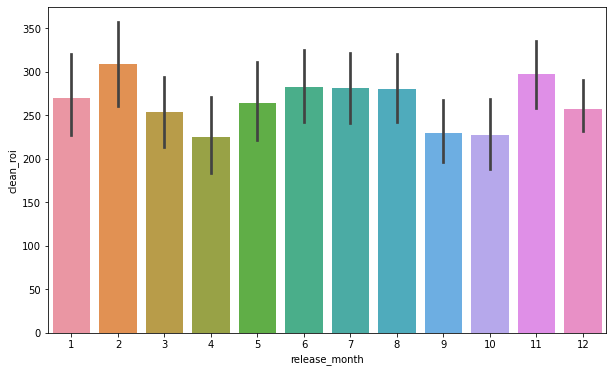

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=df3)

plt.show()

Looks like it's not the miracle we thought, but it still presents better ROI versus other months, with the potential for a "jackpot", considering the outliers in our other data.

Below is another look that includes a point plot.

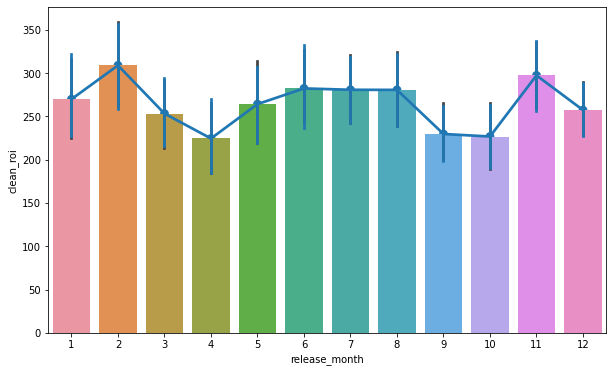

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=df3)

sns.pointplot(x="release_month", y="clean_roi", data=df3)

plt.show()